# DARTS

## Exponential Smooting

In [1]:
import pandas as pd
from darts import TimeSeries

In [2]:
# load data
df = pd.read_csv("data/AirPassangers.csv", delimiter=",")

# create times series
series = TimeSeries.from_dataframe(df, "Month", "#Passengers")

# set aside last 36 months as validation
train, val = series[:-36], series[-36:]

In [3]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

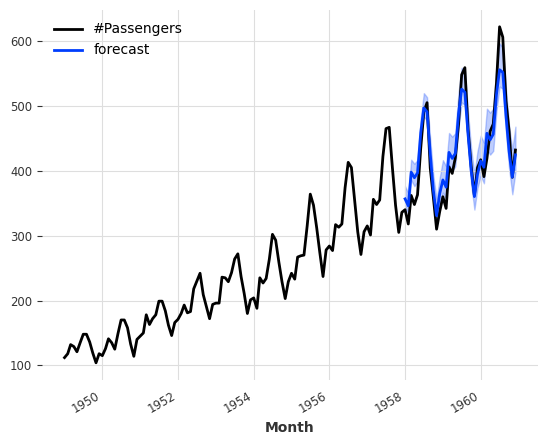

In [4]:
import matplotlib.pyplot as plt
series.plot()
prediction.plot(label="forecast", low_quantile=0.15, high_quantile=0.95)
plt.legend()

## N-BEATS

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score
from darts.datasets import EnergyDataset

AttributeError: partially initialized module 'charset_normalizer' has no attribute 'md__mypyc' (most likely due to a circular import)

In [ ]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(8, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        "R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

In [ ]:
df = EnergyDataset().load().pd_dataframe()
df["generation hydro run-of-river and poundage"].plot()
plt.title("Hourly generation hydro run-of-river and poundage")

In [ ]:
df_day_avg = df.groupby(df.index.astype(str).str.split(" ").str[0]).mean().reset_index()
filler = MissingValuesFiller()
scaler = Scaler()
series = scaler.fit_transform(
    filler.transform(
        TimeSeries.from_dataframe(
            df_day_avg, "time", ["generation hydro run-of-river and poundage"]
        )
    )
).astype(np.float32)
series.plot()
plt.title("Daily generation hydro run-of-river and poundage")

In [ ]:
train, val = series.split_after(pd.Timestamp("20170901"))

### Generic Architecture

In [ ]:
model_nbeats = NBEATSModel(
    input_chunk_length=30,
    output_chunk_length=7,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=2,
    nr_epochs_val_period=1,
    batch_size=800,
    model_name="nbeats_run",
)

In [ ]:
model_nbeats.fit(train, val_series=val, verbose=True).cuda()

In [ ]:
pred_series = model_nbeats.historical_forecasts(
    series,
    start=pd.Timestamp("20170901"),
    forecast_horizon=7,
    stride=5,
    retrain=False,
    verbose=True,
)
display_forecast(pred_series, series, "7 day", start_date=pd.Timestamp("20170901"))

In [ ]:
series

In [1]:
import torch

In [2]:
torch.__version__

'2.0.0.dev20230220'

In [3]:
torch.cuda.is_available()

False

In [4]:
torch.zeros(1).cuda()

AssertionError: Torch not compiled with CUDA enabled

In [5]:
 torch.cuda.device_count()


0